In [4]:
import os
os.getcwd()


'c:\\Users\\Abhisaar\\Desktop\\AutoJudge\\notebooks'

In [5]:
os.listdir()

['day1_data_exploration.ipynb']

In [ ]:
import json
import pandas as pd

data = []

with open("../data/raw/dataset.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            continue

df = pd.DataFrame(data)

df = df[
    [
        "title",
        "description",
        "input_description",
        "output_description",
        "problem_class",
        "problem_score"
    ]
]

df.to_csv("../data/processed/dataset.csv", index=False)



CSV created successfully


In [9]:
import pandas as pd

df = pd.read_csv("../data/processed/dataset.csv")
df.head()


,title,description,input_description,output_description,problem_class,problem_score
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,NaN,NaN,hard,9.6
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6


In [10]:
df.columns


Index(['title', 'description', 'input_description', 'output_description',
       'problem_class', 'problem_score'],
      dtype='object')

In [11]:
df.shape


(4112, 6)

In [12]:
df.isnull().sum()


title                   0
description            81
input_description     120
output_description    131
problem_class           0
problem_score           0
dtype: int64

In [13]:
df = df.dropna(subset=['problem_class', 'problem_score'])


In [14]:
df['problem_class'].value_counts()


problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

<Axes: xlabel='problem_class'>

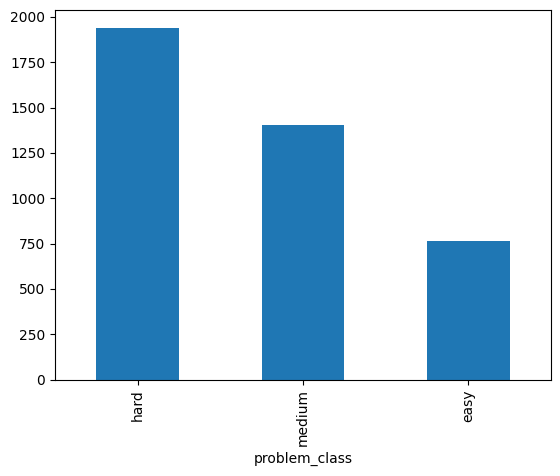

In [15]:
df['problem_class'].value_counts().plot(kind='bar')


In [16]:
df['problem_score'].describe()


count    4112.000000
mean        5.114689
std         2.177770
min         1.100000
25%         3.300000
50%         5.200000
75%         6.900000
max         9.700000
Name: problem_score, dtype: float64

<Axes: >

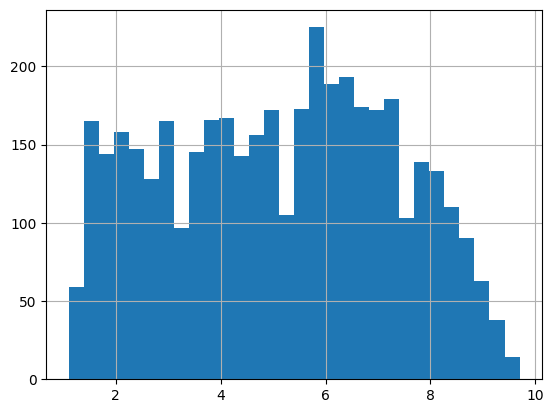

In [17]:
df['problem_score'].hist(bins=30)


In [18]:
df['desc_length'] = df['description'].astype(str).apply(len)


In [19]:
df.groupby('problem_class')['desc_length'].mean()


problem_class
easy       848.776762
hard      1265.118496
medium    1118.534520
Name: desc_length, dtype: float64

<Axes: xlabel='problem_class', ylabel='desc_length'>

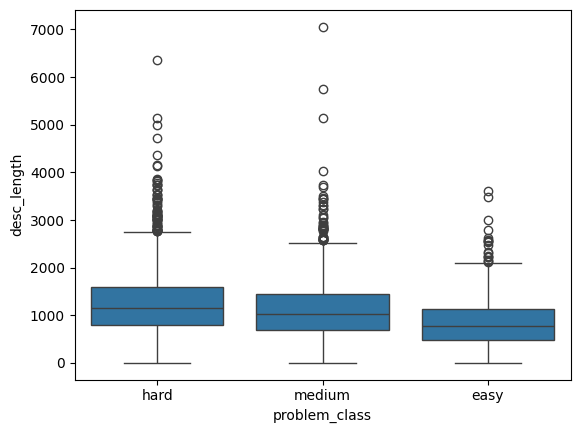

In [20]:
import seaborn as sns
sns.boxplot(x='problem_class', y='desc_length', data=df)
